In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
import os
import glob
import shutil  
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,f1_score, precision_score, accuracy_score,average_precision_score
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
cwd = "/content/drive/My Drive"
os.chdir(cwd)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#!pip install tensorflow-gpu

In [ ]:
os.chdir('Deep_Image/Projet/')
os.getcwd()

'/content/drive/My Drive/Deep_Image/Projet'

## **Hyperparameters**

In [ ]:
seed=42
input_shape= (224, 224, 3)
train_batch=32
val_batch=32
test_batch=10
size_train_data=1046
size_val_data=130
size_test_data=130


In [ ]:
train_path="./train_set"
val_path="./val_set"
test_path="./test_set"

## **Splitting data into train, val and test sets**
Creation of the folders: train_set, val_set and test_set, with sub folders : No Mask and Mask

The aim is to use the "flow from directory" method of Keras afterward

In [ ]:
labels=pd.read_csv('train_labels.csv', sep=',')

In [ ]:
#os.mkdir("train_set");
#os.mkdir("test_set");
#os.mkdir("val_set");

In [ ]:
#os.mkdir("train_set/Mask");
#os.mkdir("train_set/NoMask");
#os.mkdir("val_set/Mask");
#os.mkdir("val_set/NoMask");
#os.mkdir("test_set/Mask");
#os.mkdir("test_set/NoMask");

In [ ]:
"""size_test=0.1
size_val=0.1
#Shuffling data
image_list=shuffle(labels.values, random_state=seed)
train_list=image_list[: int(len(image_list)*(1-(size_test+size_val)))]
val_list=image_list[int(len(image_list)*(1-(size_test+size_val)))+1:int(len(image_list)*(1-size_test))]
test_list=image_list[int(len(image_list)*(1-size_test))+1:]
print("train size: ", len(train_list) )
print("val size: ", len(val_list) )
print("test size: ", len(test_list) )"""

'size_test=0.1\nsize_val=0.1\n#Shuffling data\nimage_list=shuffle(labels.values, random_state=seed)\ntrain_list=image_list[: int(len(image_list)*(1-(size_test+size_val)))]\nval_list=image_list[int(len(image_list)*(1-(size_test+size_val)))+1:int(len(image_list)*(1-size_test))]\ntest_list=image_list[int(len(image_list)*(1-size_test))+1:]\nprint("train size: ", len(train_list) )\nprint("val size: ", len(val_list) )\nprint("test size: ", len(test_list) )'

In [ ]:
"""# Moving train data to train folder
for x in train_list:
  if x[1]==1:
    source = "./Dauphine_Projet_Image2020/"+str(x[0])
    destination = "./train_set/Mask/"+str(x[0])
    dest = shutil.copy(source, destination) 
  else :
    source = "./Dauphine_Projet_Image2020/"+str(x[0])
    destination = "./train_set/NoMask/"+str(x[0])
    dest = shutil.copy2(source, destination) """


'# Moving train data to train folder\nfor x in train_list:\n  if x[1]==1:\n    source = "./Dauphine_Projet_Image2020/"+str(x[0])\n    destination = "./train_set/Mask/"+str(x[0])\n    dest = shutil.copy(source, destination) \n  else :\n    source = "./Dauphine_Projet_Image2020/"+str(x[0])\n    destination = "./train_set/NoMask/"+str(x[0])\n    dest = shutil.copy2(source, destination) '

In [ ]:
# Moving test data to train folder
"""for x in test_list:
  if x[1]==1:
    source = "./Dauphine_Projet_Image2020/"+str(x[0])
    destination = "./test_set/Mask/"+str(x[0])
    dest = shutil.copy(source, destination) 
  else :
    source = "./Dauphine_Projet_Image2020/"+str(x[0])
    destination = "./test_set/NoMask/"+str(x[0])
    dest = shutil.copy(source, destination) """

'for x in test_list:\n  if x[1]==1:\n    source = "./Dauphine_Projet_Image2020/"+str(x[0])\n    destination = "./test_set/Mask/"+str(x[0])\n    dest = shutil.copy(source, destination) \n  else :\n    source = "./Dauphine_Projet_Image2020/"+str(x[0])\n    destination = "./test_set/NoMask/"+str(x[0])\n    dest = shutil.copy(source, destination) '

In [ ]:
# Moving validation data to val folder
"""for x in val_list:
  if x[1]==1:
    source = "./Dauphine_Projet_Image2020/"+str(x[0])
    destination = "./val_set/Mask/"+str(x[0])
    dest = shutil.copy(source, destination) 
  else :
    source = "./Dauphine_Projet_Image2020/"+str(x[0])
    destination = "./val_set/NoMask/"+str(x[0])
    dest = shutil.copy(source, destination) """

'for x in val_list:\n  if x[1]==1:\n    source = "./Dauphine_Projet_Image2020/"+str(x[0])\n    destination = "./val_set/Mask/"+str(x[0])\n    dest = shutil.copy(source, destination) \n  else :\n    source = "./Dauphine_Projet_Image2020/"+str(x[0])\n    destination = "./val_set/NoMask/"+str(x[0])\n    dest = shutil.copy(source, destination) '

# **Create generators for train , validation and test sets**

The function bellow creates data iterators with train, validation and test sets, to iteratively train and test the model 

The parameter **rescale** will be useful when we will use this function to only display some images and we don't need to rescale. 

**Data augmentation** parameter will be used for the data augmentation section. Then this function will generate images with some modifications:
Rotation ,with and height shifts , horizontal flip (the vertical flip in this context should not be relevant)
fill mode is reflect because it's the most realistic 

In [ ]:
def data_generator(rescale=True, data_aug=False):
  if (rescale==True) & (data_aug==False):
    datagen= ImageDataGenerator(rescale=1./255)
  if (rescale==False) & (data_aug==False):
    datagen=ImageDataGenerator()
  if (rescale==False) & (data_aug==True):
    datagen=ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode="reflect"
        )
  if (rescale==True) & (data_aug==True):
    datagen=ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode="reflect"
        )
  train_generator = datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=train_batch,
    classes=["Mask", "NoMask"],
   #class_mode="categorical",
   shuffle=True,
   seed=seed)
  
  val_generator=ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=val_batch,
    classes=["Mask", "NoMask"],
    shuffle=True,
    seed=seed)
    
  test_generator=ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=test_batch,
    classes=["Mask", "NoMask"],
    shuffle=True,
    seed=seed)
  return train_generator, val_generator, test_generator


#**Visualising sample of data**

In [ ]:
def display_images(images_, labels_, rows_,cols_):
  fig = plt.figure(figsize=(12,6))
  images_=np.array(images_).astype(np.uint8)
  
  for i in range(len(images_)):
    sp=fig.add_subplot(rows_, cols_, i+1)
    sp.axis('Off')
    sp.set_title(labels_[i], fontsize=16)
    plt.imshow(images_[i])

In [ ]:
sample=data_generator(rescale=False, data_aug=False)[0]

Found 1046 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
images, labels= next(sample)

In [ ]:
images.shape

(32, 224, 224, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



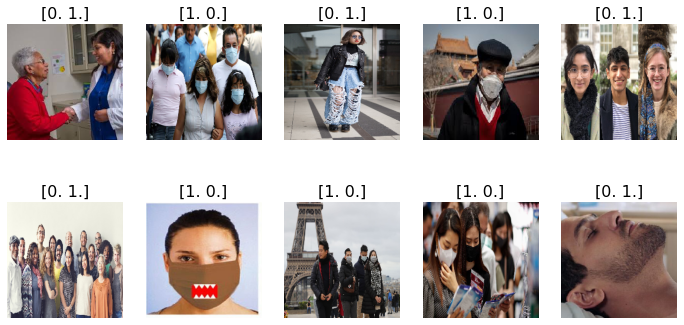

In [ ]:
display_images(images[0:10], labels[0:10],2,5)

# **I- Basic Model**




In [ ]:
train_generator, val_generator, test_generator=data_generator(rescale=True, data_aug=False)

Found 1046 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
def basicModel(filters_, kernel_size_=3, max_pooling_size_=2, input_shape_=input_shape, seed=seed):
  F1,F2,F3= filters_
  np.random.seed(seed)
  tf.random.set_seed(seed)
  model_ = tf.keras.Sequential()
  if F1!=0:
    model_.add(Conv2D(filters=F1, kernel_size=kernel_size_, activation="relu", input_shape=input_shape_, padding='same'))
  if F2!=0:
    model_.add(Conv2D(filters=F2, kernel_size=kernel_size_, activation="relu", padding='same'))
    model_.add(MaxPooling2D(max_pooling_size_))
  if F3!=0:
    model_.add(Conv2D(filters=F3, kernel_size=kernel_size_, activation="relu", padding='same'))
    model_.add(MaxPooling2D(max_pooling_size_))
  model_.add(tf.keras.layers.Flatten())
  model_.add(Dropout(0.2))
  model_.add(tf.keras.layers.Dense(2, activation='softmax'))
  model_.compile(loss='categorical_crossentropy',
                optimizer=SGD(lr=0.0005, momentum=0.9),
                metrics=['accuracy'])
  model_.summary()
  return model_

In [ ]:
model=basicModel([32, 32,64])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dropout (Dropout)            (None, 200704)            0

## I.a  Training 

In [ ]:
epochs=20

history=model.fit_generator(train_generator, steps_per_epoch=int(size_train_data/train_batch), epochs=epochs,  validation_data=val_generator, validation_steps= int(size_val_data/val_batch) ,verbose=2,  use_multiprocessing=True)
model.save('Basic_model.h5')

In [ ]:
def accuracy_lost_curves(history, name):
  # plot loss
  fig = plt.figure(figsize=(10,12))
  ax1 = fig.add_subplot(2,1,1)
  ax1.plot(history.history['loss'], color='blue', label='train')
  ax1.plot(history.history['val_loss'], color='red', label='test')
  ax1.set_ylim([0, 1.5])
  ax1.set_title('Cross Entropy Loss'+name)
  ax1.legend(['Training Loss', 'Validation Loss'])
	# plot accuracy
  ax2 = fig.add_subplot(2,1,2)
  ax2.plot(history.history['accuracy'], color='blue', label='train')
  ax2.plot(history.history['val_accuracy'], color='red', label='test')
  ax2.set_ylim([0.3, 1])
  ax2.set_title('Classification Accuracy'+name)
  ax2.legend(['Training Acc', 'Validation Acc'])
  plt.savefig(name+'grahp.png')

In [ ]:
# Final train and valisation performances 
df=pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.466767,0.787968,0.748555,0.632812
16,0.460689,0.793886,0.691483,0.656250
17,0.427879,0.812623,0.719130,0.601562
18,0.420123,0.816568,0.711757,0.648438
19,0.407283,0.826430,0.867762,0.593750


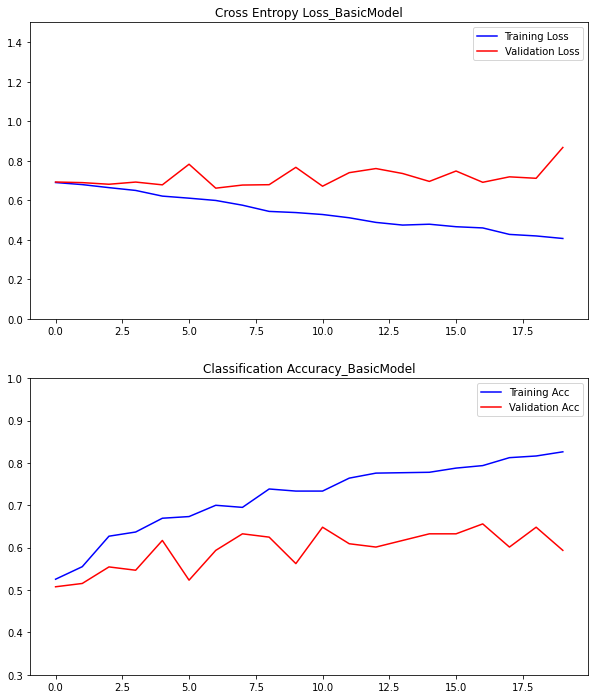

In [ ]:
accuracy_lost_curves(history, '_BasicModel')

We need to learn more diversified data, the accuracy stagnates after only few epochs

## I.b  Predictions

In [ ]:
predictions= model.predict_generator(test_generator, steps=int(size_test_data/test_batch) , verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
13/13 [==============================] - 50s 4s/step


In [ ]:
predictions[0]


array([0.19957575, 0.8004243 ], dtype=float32)

The predictions for the first image are : Mask with probability of 0.62 and No Mask with probability of 0.37. So if we round the fist column of predictions => label 1 will be mask and label 0 will be No Mask

In [ ]:
pred=predictions[:,0].round()
pred[0]

0.0

## I.c  Evaluation

In [ ]:
  test_labels=test_generator.labels
  cm=confusion_matrix(test_labels, pred )

In [ ]:
def plot_confusion_matrix(cm):
  labels= [ "NoMask","Mask"]
  title= "Confusion Matrix: F= False , T= True , N= Negative (No Mask) , P= Postive (Mask)"
  data = go.Heatmap(z=cm, y=labels, x=labels, colorscale="blues")
  s = [ ['TN','FP'],['FN', 'TP']]
  annotations = []
  for i, row in enumerate(cm):
      for j, value in enumerate(row):
          annotations.append(
              {
                  "x": labels[j],
                  "y": labels[i],
                  "font": {"color": "black", "size":16},
                  "text": s[i][j]+" : "+str(value),
                  "xref": "x1",
                  "yref": "y1",
                  "align":"center",
                  "showarrow": False
            
              }
          )
  layout = {
      "title": title,
      "xaxis": {"title": "Predicted value"},
      "yaxis": {"title": "Real value"},
      "annotations": annotations,
      "width":800,
      "height":500
  }
  fig = go.Figure(data=data, layout=layout)
  return fig

In [ ]:
plot_confusion_matrix(cm)

In [ ]:
loss, acc=model.evaluate_generator(test_generator, verbose=1)


13/13 [==============================] - 1s 105ms/step - loss: 0.8016 - accuracy: 0.5692


In [ ]:
acc=(accuracy_score(test_labels, pred)*100).round(2)
print(f'Accuracy score for the basic model: {acc} %')

Accuracy score for the basic model: 52.31 %


In [ ]:
# As expected with this simple model 

##### **Other metrics:**
If our goal is to detect people who are not wearing masks, we should give importance to the number of False Postive. So we should also pay attention to the precision score. The higher the precision, the less false positives cases we have.

In [ ]:
avg_precision = (average_precision_score(test_labels, predictions[:,0].round())*100).round(2)
print(f'Precision score for the basic model: {avg_precision} %')

Precision score for the basic model: 48.4 %


Or if we want to consider both false negatives and false postives, we try to maximize F1_ score. 

In [ ]:
F1_B=(f1_score(test_labels, pred)*100).round(2)
print(f'f1 score for the basic model: {F1_B} %')

Precision score for the basic model: 38.0 %


# **II Pretrained Basic Model With Data augmentation**

## II.a  Training

In [ ]:
train_generator_aug =data_generator(rescale=True, data_aug=True)[0]

Found 1046 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_aug2 = load_model('Basic_model.h5')

In [ ]:
results = model_aug2.evaluate_generator(val_generator)
print(" validation loss and accuracy are", results)
epochs=30
history_aug2=model_aug2.fit_generator(train_generator_aug, steps_per_epoch=int(size_train_data/train_batch), epochs=epochs,  validation_data=val_generator, validation_steps= int(size_val_data/val_batch) ,verbose=1,  use_multiprocessing=True)
model_aug2.save('basic_model_data_aug.h5') 

In [ ]:
# Final train and valisation performances 
df=pd.DataFrame(history_aug2.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.574880,0.713018,0.609006,0.687500
26,0.587318,0.693294,0.613621,0.687500
27,0.583101,0.699211,0.604484,0.703125
28,0.604401,0.689349,0.593335,0.718750
29,0.564139,0.714004,0.614479,0.687500


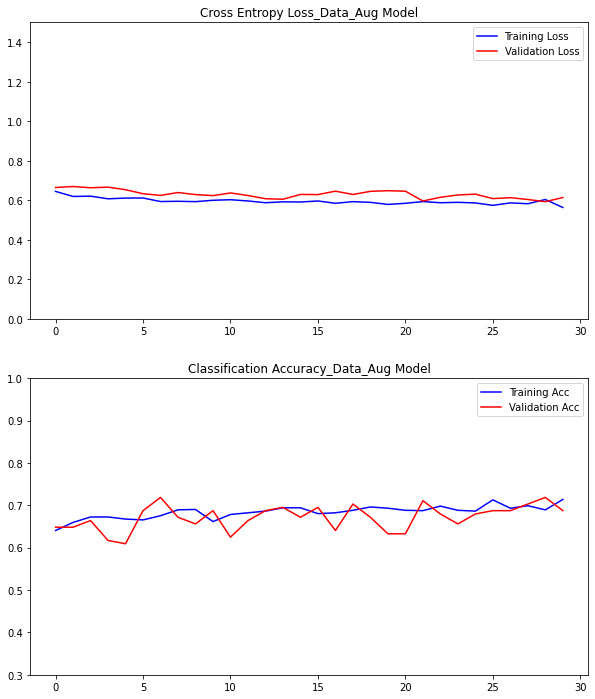

In [ ]:
accuracy_lost_curves(history_aug2, '_Data_Aug Model')

Data augmentation reduced the gap between training and validation preformances. It helps to generalize better, but we still need a more powerful model

## II.b  Predictions

In [ ]:
predictions= model_aug2.predict_generator(test_generator, steps=int(size_test_data/test_batch) , verbose=1)

13/13 [==============================] - 1s 107ms/step


In [ ]:
pred_aug=predictions[:,0].round()
pred_aug[0]

0.0

## II.c  Evaluation

In [ ]:
test_labels=test_generator.labels
cm=confusion_matrix(test_labels, pred )
cm

array([[49, 19],
       [43, 19]])

In [ ]:

plot_confusion_matrix(cm)

In [ ]:
loss_aug, acc_aug=model_aug2.evaluate_generator(test_generator, verbose=1)


13/13 [==============================] - 1s 103ms/step - loss: 0.5874 - accuracy: 0.7154


In [ ]:
acc_aug*100

71.53846025466919

Using the previous pretrained model in addition to data augmentation allowed to increase accuracy 

##### **Other metrics:**
If our goal is to detect people who are not wearing masks, we should give importance to the number of False Postive. So we should also pay attention to the precision score. The higher the precision, the less false positives cases we have.

In [ ]:
precision_Aug2=(precision_score(test_labels, predictions[:,0].round())*100).round(2)
print(f'accuracy score for the basic model: {precision_Aug2} %')

Precision score for the basic model: 47.89 %


In [ ]:
avg_precision = (average_precision_score(test_labels, predictions[:,0].round())*100).round(2)
print(f'Precision score for the basic model: {avg_precision} %')

Precision score for the basic model: 47.8 %


Or if we want to consider both false negatives and false postives, we try to maximize F1_ score. 

In [ ]:
F1_Aug2=(f1_score(test_labels, pred_aug)*100).round(2)
print(f'f1 score for the basic model: {F1_Aug2} %')

Precision score for the basic model: 51.13 %


# **III Transfer learning**




## **1.   VGG19**






In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization

modeltf=tf.keras.applications.VGG19(weights = 'imagenet', include_top = False, input_shape=input_shape)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
def transfer_Learning_model(model=modeltf):
  base_model = modeltf
  base_model.trainable = False 
  top_layers = tf.keras.Sequential()
  top_layers.add(GlobalAveragePooling2D())
  top_layers.add(Dense(128, activation='relu'))
  top_layers.add(BatchNormalization())
  top_layers.add(Dropout(0.5))
  top_layers.add(Dense(2, activation='softmax'))

  model= tf.keras.Sequential([
      base_model, 
      top_layers
  ])
  opt = tf.keras.optimizers.SGD(lr=0.0005, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
vgg19_model = transfer_Learning_model(model=modeltf)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
sequential_1 (Sequential)    (None, 2)                 66434     
Total params: 20,090,818
Trainable params: 66,178
Non-trainable params: 20,024,640
_________________________________________________________________


In [ ]:
train_generator, val_generator, test_generator = data_generator(rescale=True, data_aug=True)


Found 1046 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
epochs=30

history_VGG=vgg19_model.fit_generator(train_generator, steps_per_epoch=int(size_train_data/train_batch), epochs=epochs,  validation_data=val_generator, validation_steps= int(size_val_data/val_batch) ,verbose=2,  use_multiprocessing=True)


In [ ]:
# Final train and valisation performances 
df=pd.DataFrame(history_VGG.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.538835,0.731755,0.412442,0.835938
26,0.529169,0.743590,0.421700,0.820312
27,0.525990,0.724852,0.415731,0.835938
28,0.537975,0.736686,0.415946,0.835938
29,0.511015,0.753452,0.414637,0.835938


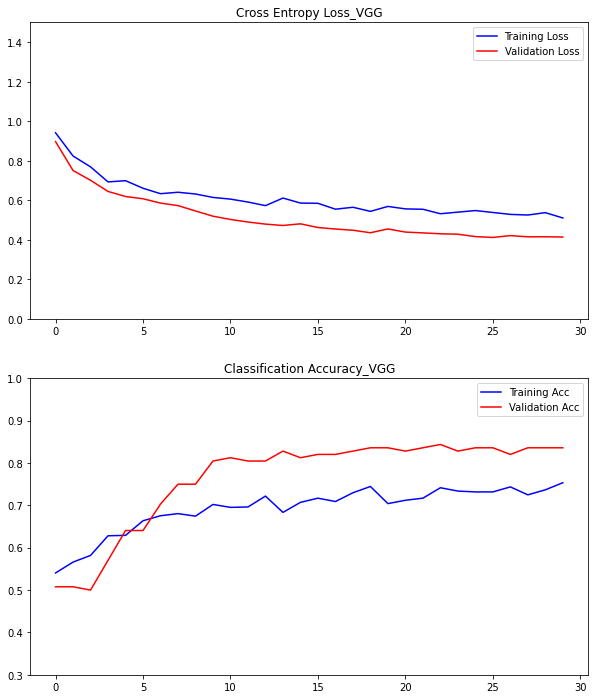

In [ ]:
accuracy_lost_curves(history_VGG, "_VGG")

We need to train with more epochs to increase train accuracy and then the validation accuracy

## Predictions

In [ ]:
predictions= vgg19_model.predict_generator(test_generator, steps=int(size_test_data/test_batch) , verbose=1)

13/13 [==============================] - 1s 96ms/step


In [ ]:
pred_vgg=predictions[:,0].round()
pred_vgg[0]

1.0

## Evaluation

In [ ]:
test_labels=test_generator.labels
cm=confusion_matrix(test_labels, pred_vgg )
cm

array([[35, 33],
       [37, 25]])

In [ ]:
plot_confusion_matrix(cm)

In [ ]:
loss, acc=vgg19_model.evaluate_generator(test_generator, verbose=1)


13/13 [==============================] - 2s 117ms/step - loss: 0.4861 - accuracy: 0.7538


In [ ]:
accuracy_vgg=round(acc*100,2)
print(f'accuracy score for the VGG19 model: {accuracy_vgg} %')

Precision score for the VGG19 model: 75.38 %


as expected , we've got a higher accuracy with VGG transfer learning , but we can do better with more epochs or with other recent transfer learning models 

We will try a resnet model and inception model in the other sections


##### **Other metrics:**
the precision and the f1 score are both higer than the prvious ones 

In [ ]:
precision_vgg=(average_precision_score(test_labels, pred_vgg.round())*100).round(2)
print(f'Precision score for VGG model: {precision_vgg} %')

Precision score for VGG model: 45.84 %


In [ ]:
F1_vgg=(f1_score(test_labels, pred_vgg.round())*100).round(2)
print(f'F1 score for VGG model: {F1_vgg} %')

F1 score for VGG model: 41.67 %


## **2.   ResNet152v2**





The ResNet models can learn with a large number of epochs while avoiding falling into the problem of vanishing / exploding gradient thanks to the shortcut link. 

In [ ]:
base_model = tf.keras.applications.ResNet152V2(weights="imagenet", include_top=False,input_shape=input_shape)

234553344/234545216 [==============================] - 2s 0us/step


In [ ]:
resnet_model = transfer_Learning_model(base_model)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
sequential_3 (Sequential)    (None, 2)                 66434     
Total params: 20,090,818
Trainable params: 66,178
Non-trainable params: 20,024,640
_________________________________________________________________


In [ ]:
train_generator, val_generator, test_generator = data_generator(rescale=True, data_aug=True)
# trying with data augmentation

Found 1046 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
epochs=35

history_resnet=resnet_model.fit_generator(train_generator, steps_per_epoch=int(size_train_data/train_batch), epochs=epochs,  validation_data=val_generator, validation_steps= int(size_val_data/val_batch) ,verbose=2,  use_multiprocessing=True)


In [ ]:
# Final train and valisation performances 
df=pd.DataFrame(history_resnet.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
30,0.530902,0.740631,0.414158,0.851562
31,0.542357,0.734714,0.403045,0.851562
32,0.541189,0.731755,0.396732,0.867188
33,0.500983,0.761719,0.405362,0.835938
34,0.536389,0.739645,0.410723,0.835938


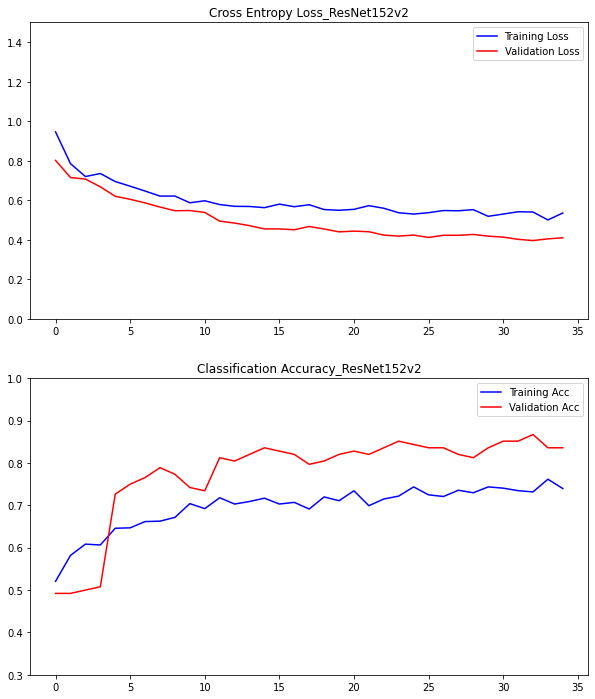

In [ ]:
accuracy_lost_curves(history_resnet, "_ResNet152v2")

In [ ]:
#

##  Predictions

In [ ]:
predictions= resnet_model.predict_generator(test_generator, steps=int(size_test_data/test_batch) , verbose=1)

13/13 [==============================] - 1s 98ms/step


In [ ]:
pred_resnet=predictions[:,0].round()
pred_resnet[0]

1.0

##  Evaluation

In [ ]:
test_labels=test_generator.labels
cm=confusion_matrix(test_labels, pred_resnet )
cm

array([[29, 39],
       [32, 30]])

In [ ]:
plot_confusion_matrix(cm)

In [ ]:
loss, acc_resnet=resnet_model.evaluate_generator(test_generator, verbose=1)


13/13 [==============================] - 1s 107ms/step - loss: 0.4655 - accuracy: 0.7923


In [ ]:
accuracy_resnet=round(acc_resnet*100,2)
print(f'accuracy score for the ResNet model: {accuracy_resnet} %')

accuracy score for the ResNet model: 79.23 %


##### **Other metrics:**
If our goal is to detect people who are not wearing masks, we should give importance to the number of False Postive. So we should also pay attention to the precision score. The higher the precision, the less false positives cases we have.

In [ ]:
precision_resnet=(average_precision_score(test_labels, pred_resnet.round())*100).round(2)
print(f'Precision score for the basic model: {precision_resnet} %')

Precision score for the basic model: 45.65 %


Or if we want to consider both false negatives and false postives, we try to maximize F1_ score. 

In [ ]:
F1_resnet=(f1_score(test_labels, pred_resnet.round())*100).round(2)
print(f'f1 score for the basic model: {F1_resnet} %')

Precision score for the basic model: 45.8 %






## **3.   InceptionResNetV2**






Inception models have side branches with a softmax activation, that are predicting the output of the hidden layers. The goal is to make sur that even the hidden layers are not too bad to predict the output image, and this has a regularization effect and helps to have a better generalization

In [ ]:
modeltf=tf.keras.applications.InceptionResNetV2(weights = 'imagenet', include_top = False, input_shape=input_shape)

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
incep_model = transfer_Learning_model(model=modeltf)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 5, 5, 1536)        54336736  
_________________________________________________________________
sequential_5 (Sequential)    (None, 2)                 197506    
Total params: 54,534,242
Trainable params: 197,250
Non-trainable params: 54,336,992
_________________________________________________________________


In [ ]:
train_generator, val_generator, test_generator = data_generator(rescale=True, data_aug=True)


Found 1046 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
epochs=35

history_incep=incep_model.fit_generator(train_generator, steps_per_epoch=int(size_train_data/train_batch), epochs=epochs,  validation_data=val_generator, validation_steps= int(size_val_data/val_batch) ,verbose=2,  use_multiprocessing=True)


In [ ]:
# Final train and valisation performances 
df=pd.DataFrame(history_incep.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
30,0.204274,0.920118,0.040973,0.992188
31,0.175694,0.924063,0.051824,0.992188
32,0.208221,0.917160,0.039127,0.992188
33,0.194795,0.926036,0.044456,0.984375
34,0.215092,0.918146,0.062356,0.976562


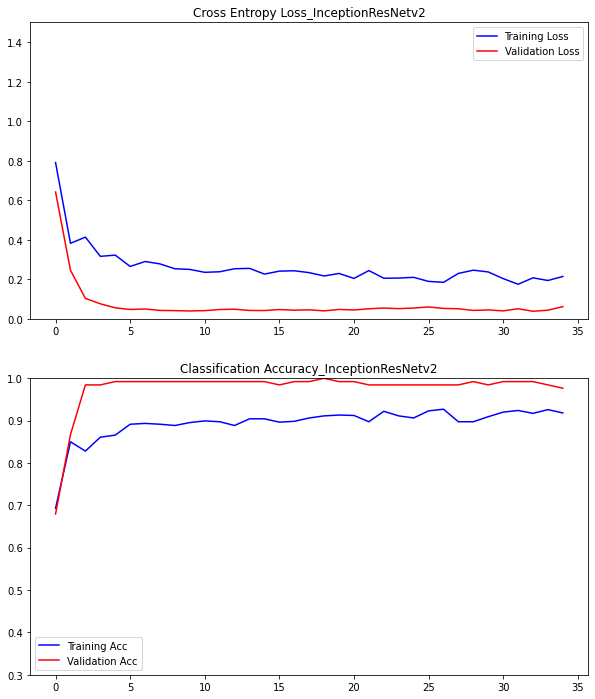

In [ ]:
accuracy_lost_curves(history_incep, "_InceptionResNetv2")

after only few epochs we have acheived really good performances on validation set

##  Predictions

In [ ]:
predictions= incep_model.predict_generator(test_generator, steps=int(size_test_data/test_batch) , verbose=1)

13/13 [==============================] - 1s 104ms/step


In [ ]:
pred_incep=predictions[:,0].round()
pred_incep[0]

1.0

##  Evaluation

In [ ]:
test_labels=test_generator.labels
cm=confusion_matrix(test_labels, pred_incep )
cm

array([[32, 36],
       [31, 31]])

In [ ]:
plot_confusion_matrix(cm)

In [ ]:
loss, acc_=incep_model.evaluate_generator(test_generator, verbose=1)


13/13 [==============================] - 2s 118ms/step - loss: 0.2203 - accuracy: 0.9154


In [ ]:
accuracy_incep=round(acc_*100,2)
print(f'accuracy score for the incepctionResnetV2 model: {accuracy_incep} %')

accuracy score for the incepctionResnetV2 model: 91.54 %


##### **Other metrics:**
If our goal is to detect people who are not wearing masks, we should give importance to the number of False Postive. So we should also pay attention to the precision score. The higher the precision, the less false positives cases we have.

In [ ]:
precision_incep=(average_precision_score(test_labels, pred_incep.round())*100).round(2)
print(f'Precision score for the basic model: {precision_incep} %')

Precision score for the basic model: 46.98 %


Or if we want to consider both false negatives and false postives, we try to maximize F1_ score. 

In [ ]:
F1_incep=(f1_score(test_labels, pred_incep.round())*100).round(2)
print(f'f1 score for the basic model: {F1_incep} %')

Precision score for the basic model: 48.06 %


# **IV Recap**


Below a performance summary table

In [ ]:
df_Basic=pd.DataFrame(history.history)
df_aug=pd.DataFrame(history_aug2.history)
df_vgg=pd.DataFrame(history_VGG.history)
df_resnet=pd.DataFrame(history_resnet.history)
df_incep=pd.DataFrame(history_incep.history)

In [ ]:
train_accuracies=[round(df_Basic.iloc[-1,1],2),round(df_aug.iloc[-1,1],2),round(df_vgg.iloc[-1,1],2),round(df_resnet.iloc[-1,1],2),round(df_incep.iloc[-1,1],2)]

In [ ]:
val_accuracies=[round(df_Basic.iloc[-1,-1],2),round(df_aug.iloc[-1,-1],2),round(df_vgg.iloc[-1,-1],2),round(df_resnet.iloc[-1,-1],2),round(df_incep.iloc[-1,-1],2)]

In [ ]:
test_accuracies=[acc,round(acc_aug,2),accuracy_vgg,accuracy_resnet, accuracy_incep]

In [ ]:
index=["Basic", "data_aug", "VGG19", "Resnet152v2", "InceptionResNet"]

In [ ]:
accuracies={"train_accuracy":train_accuracies, "val_accuracy":val_accuracies, "test_accuracy":test_accuracies,}

In [ ]:
acc_results=pd.DataFrame(data=accuracies, index=index)

In [ ]:
acc_results

,train_accuracy,val_accuracy,test_accuracy
Basic,0.83,0.59,52.31
data_aug,0.71,0.69,0.72
VGG19,0.75,0.84,75.38
Resnet152v2,0.74,0.84,79.23
InceptionResNet,0.92,0.98,91.54
